# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

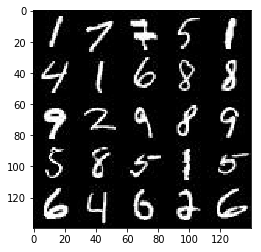

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

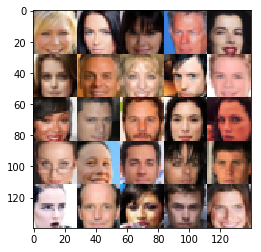

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.6.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [11]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    input_lr = tf.placeholder(tf.float32, None, name='learning_rate')
    return inputs_real, input_z, input_lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [42]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        relu1 = tf.nn.leaky_relu(x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.nn.leaky_relu(bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.nn.leaky_relu(bn3)
        
        reshape = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(reshape, 1, kernel_initializer=tf.contrib.layers.xavier_initializer())
        output = tf.sigmoid(logits)
    
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [41]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*256, kernel_initializer=tf.contrib.layers.xavier_initializer())
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.nn.leaky_relu(x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.nn.leaky_relu(x2)
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, 2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.nn.leaky_relu(x3)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, 1, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        output = tf.tanh(logits)
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [21]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [22]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [29]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    image, z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    channels = 1 if data_image_mode == 'L' else 3
    d_loss, g_loss = model_loss(image, z, channels)
    d_optim, g_optim = model_opt(d_loss, g_loss, lr, beta1)
    z_test = np.random.uniform(-1, 1, size=(16, z_dim))
    
    with tf.Session() as sess:
        step = 0
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_optim, feed_dict={image: batch_images, z: batch_z, lr: learning_rate})
                _ = sess.run(g_optim, feed_dict={image: batch_images, z: batch_z, lr: learning_rate})
                
                if step % 100 == 0:
                    train_loss_d = d_loss.eval({image: batch_images, z: batch_z, lr: learning_rate})
                    train_loss_g = g_loss.eval({image: batch_images, z: batch_z, lr: learning_rate})

                    print("Epoch {}".format(epoch_i),
                          "Step {}".format(step),
                          "d_loss: {}".format(train_loss_d),
                          "g_loss: {}".format(train_loss_g))
                    
                    show_generator_output(sess, 16, z, channels, data_image_mode)
                step += 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0 Step 0 d_loss: 12.971905708312988 g_loss: 7.071116669976618e-06


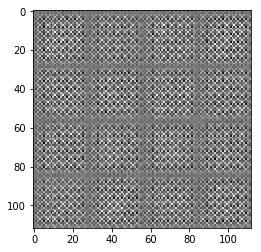

Epoch 0 Step 100 d_loss: 1.615128993988037 g_loss: 0.5646395087242126


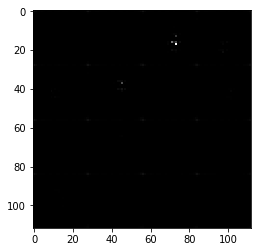

Epoch 0 Step 200 d_loss: 1.117859959602356 g_loss: 3.690108299255371


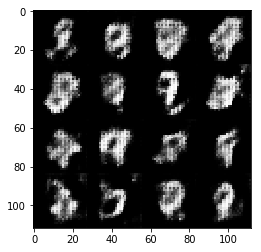

Epoch 0 Step 300 d_loss: 0.13778647780418396 g_loss: 2.4446420669555664


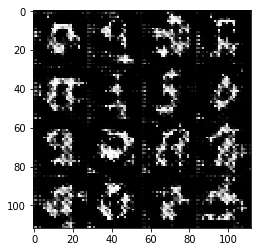

Epoch 0 Step 400 d_loss: 0.03034302033483982 g_loss: 5.171505928039551


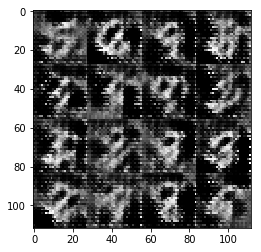

Epoch 0 Step 500 d_loss: 0.3100931644439697 g_loss: 4.017277717590332


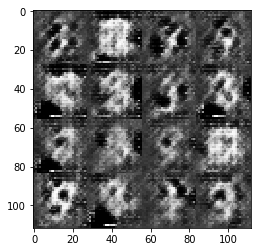

Epoch 0 Step 600 d_loss: 0.05631457641720772 g_loss: 4.394001007080078


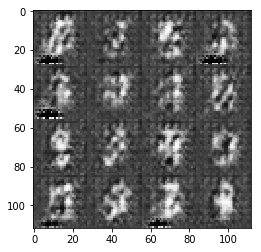

Epoch 0 Step 700 d_loss: 0.05664898827672005 g_loss: 4.605129718780518


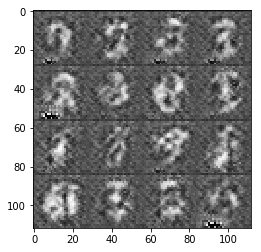

Epoch 0 Step 800 d_loss: 0.8634778261184692 g_loss: 0.680570125579834


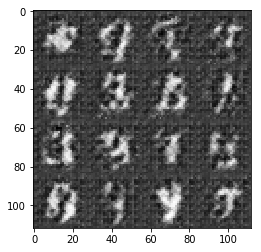

Epoch 0 Step 900 d_loss: 0.9202408194541931 g_loss: 0.6771970987319946


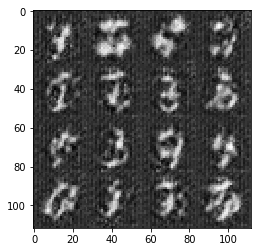

Epoch 0 Step 1000 d_loss: 0.021950235590338707 g_loss: 5.305649280548096


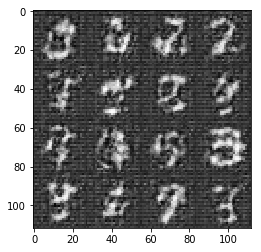

Epoch 0 Step 1100 d_loss: 0.28751957416534424 g_loss: 1.6181894540786743


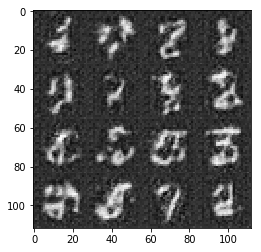

Epoch 0 Step 1200 d_loss: 0.06315378844738007 g_loss: 3.699686050415039


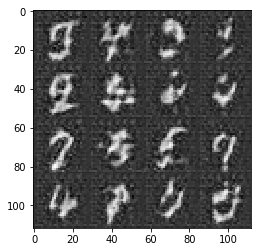

Epoch 0 Step 1300 d_loss: 1.3977081775665283 g_loss: 0.45723801851272583


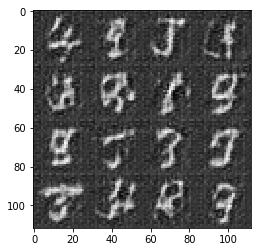

Epoch 0 Step 1400 d_loss: 0.1762547641992569 g_loss: 2.779038906097412


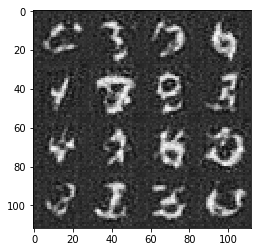

Epoch 0 Step 1500 d_loss: 0.14005860686302185 g_loss: 2.591747283935547


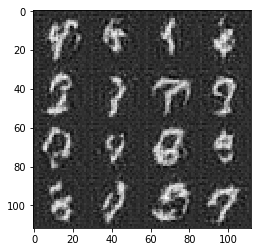

Epoch 0 Step 1600 d_loss: 2.5062222480773926 g_loss: 0.20360571146011353


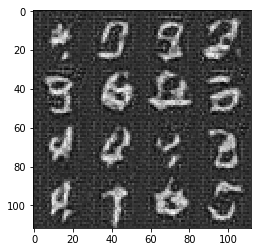

Epoch 0 Step 1700 d_loss: 0.2578776180744171 g_loss: 1.9930834770202637


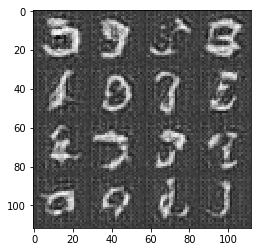

Epoch 0 Step 1800 d_loss: 0.5340743064880371 g_loss: 1.2187432050704956


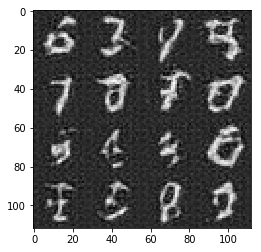

Epoch 1 Step 1900 d_loss: 0.7426343560218811 g_loss: 2.0669028759002686


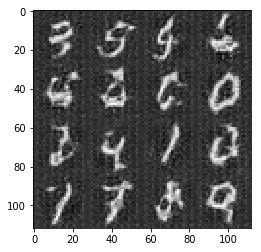

Epoch 1 Step 2000 d_loss: 0.44500234723091125 g_loss: 1.6073799133300781


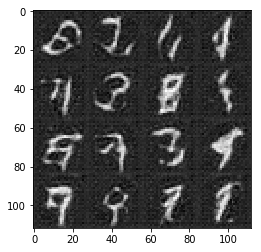

Epoch 1 Step 2100 d_loss: 0.1753140687942505 g_loss: 2.2557647228240967


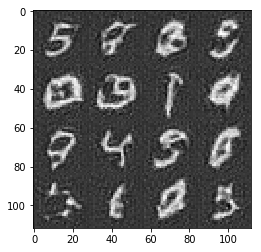

Epoch 1 Step 2200 d_loss: 0.029402444139122963 g_loss: 7.199631214141846


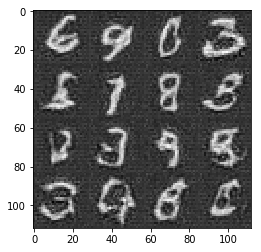

Epoch 1 Step 2300 d_loss: 0.5369578003883362 g_loss: 1.504668951034546


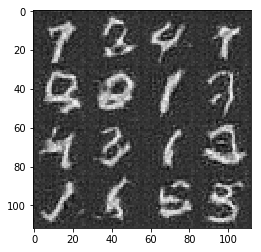

Epoch 1 Step 2400 d_loss: 5.724018573760986 g_loss: 10.098442077636719


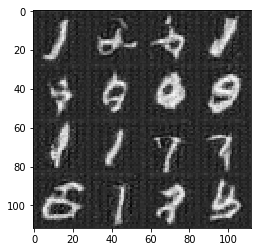

Epoch 1 Step 2500 d_loss: 0.34162071347236633 g_loss: 2.059750556945801


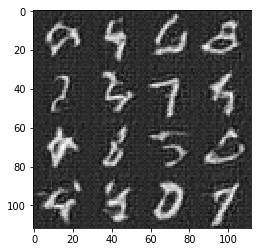

Epoch 1 Step 2600 d_loss: 1.0028585195541382 g_loss: 0.7294002175331116


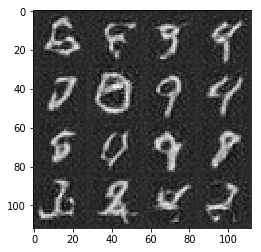

Epoch 1 Step 2700 d_loss: 0.6231421232223511 g_loss: 1.2441846132278442


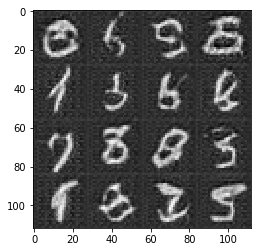

Epoch 1 Step 2800 d_loss: 0.5088905692100525 g_loss: 1.3326988220214844


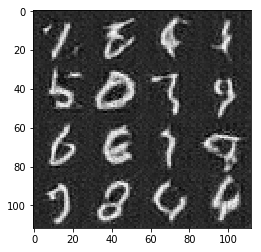

Epoch 1 Step 2900 d_loss: 0.4829421937465668 g_loss: 2.1537909507751465


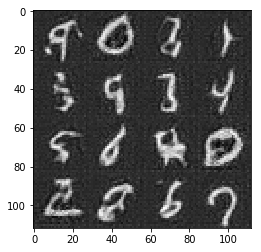

Epoch 1 Step 3000 d_loss: 0.0940202921628952 g_loss: 3.1078038215637207


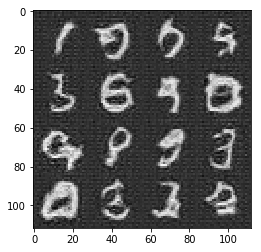

Epoch 1 Step 3100 d_loss: 0.02006729692220688 g_loss: 4.865821838378906


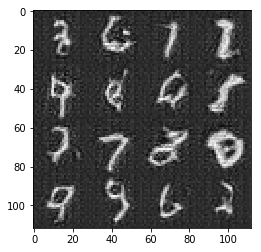

Epoch 1 Step 3200 d_loss: 0.6080861687660217 g_loss: 1.4699658155441284


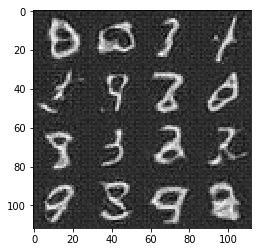

Epoch 1 Step 3300 d_loss: 0.29962632060050964 g_loss: 1.7444658279418945


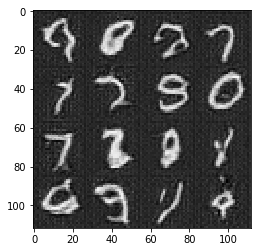

Epoch 1 Step 3400 d_loss: 0.42888137698173523 g_loss: 1.3735153675079346


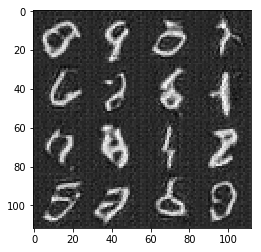

Epoch 1 Step 3500 d_loss: 0.023178447037935257 g_loss: 4.9333977699279785


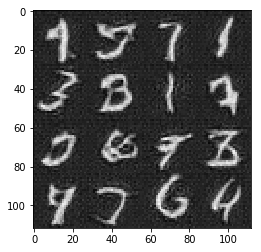

Epoch 1 Step 3600 d_loss: 0.5504011511802673 g_loss: 1.1861950159072876


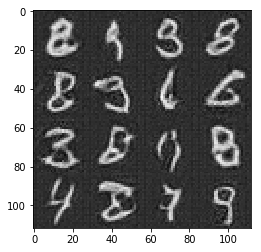

Epoch 1 Step 3700 d_loss: 0.6140924096107483 g_loss: 1.3410816192626953


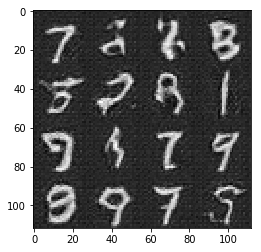

In [43]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0 Step 0 d_loss: 2.2673733234405518 g_loss: 0.35010600090026855


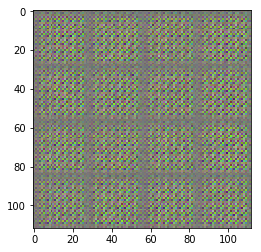

Epoch 0 Step 100 d_loss: 0.005497481673955917 g_loss: 7.054952144622803


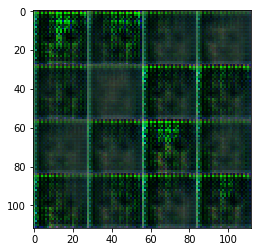

Epoch 0 Step 200 d_loss: 0.2704896628856659 g_loss: 2.3476314544677734


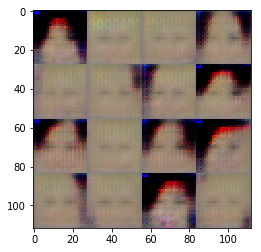

Epoch 0 Step 300 d_loss: 1.5778104066848755 g_loss: 0.8720141053199768


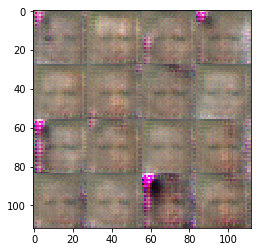

Epoch 0 Step 400 d_loss: 0.41834479570388794 g_loss: 1.619760274887085


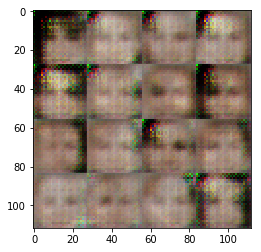

Epoch 0 Step 500 d_loss: 1.7278813123703003 g_loss: 0.3926282227039337


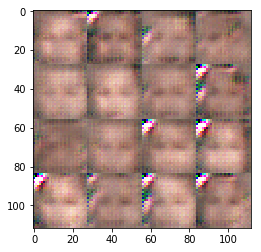

Epoch 0 Step 600 d_loss: 0.032726824283599854 g_loss: 7.276234149932861


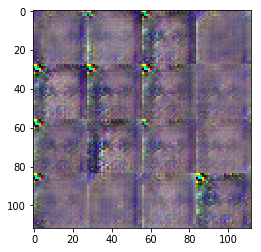

Epoch 0 Step 700 d_loss: 0.077681764960289 g_loss: 3.8747873306274414


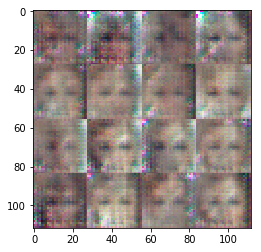

Epoch 0 Step 800 d_loss: 1.278425693511963 g_loss: 1.0475281476974487


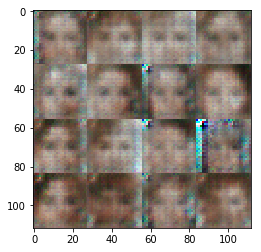

Epoch 0 Step 900 d_loss: 1.5790935754776 g_loss: 0.5568450689315796


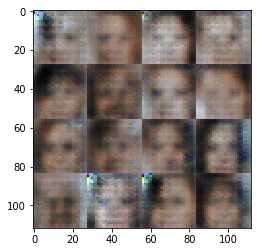

Epoch 0 Step 1000 d_loss: 1.2065458297729492 g_loss: 0.5365438461303711


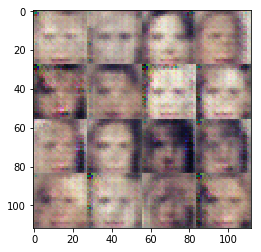

Epoch 0 Step 1100 d_loss: 1.3696858882904053 g_loss: 1.1293156147003174


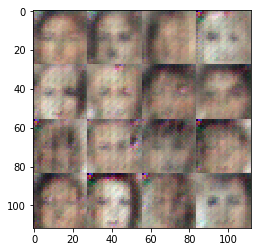

Epoch 0 Step 1200 d_loss: 1.021679401397705 g_loss: 1.0564478635787964


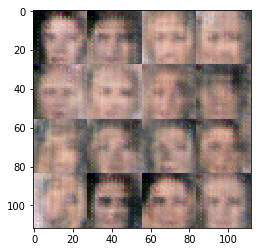

Epoch 0 Step 1300 d_loss: 1.0649003982543945 g_loss: 0.5865535736083984


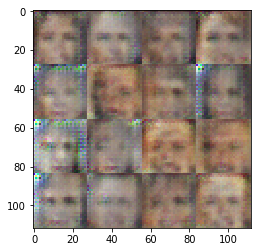

Epoch 0 Step 1400 d_loss: 0.9930543899536133 g_loss: 2.672933578491211


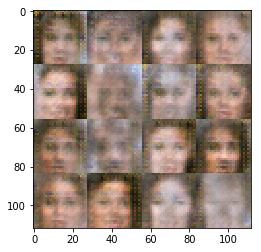

Epoch 0 Step 1500 d_loss: 1.2908134460449219 g_loss: 0.6531834602355957


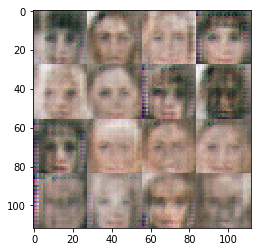

Epoch 0 Step 1600 d_loss: 1.3159477710723877 g_loss: 0.9399214386940002


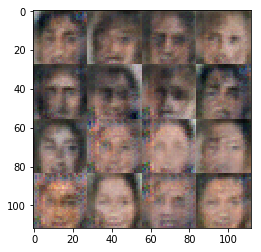

Epoch 0 Step 1700 d_loss: 1.246354341506958 g_loss: 0.8324421048164368


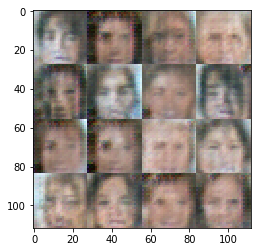

Epoch 0 Step 1800 d_loss: 1.4313565492630005 g_loss: 0.5693214535713196


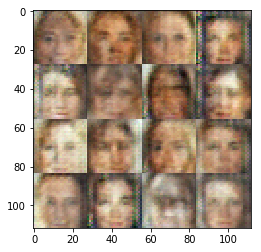

Epoch 0 Step 1900 d_loss: 1.2830731868743896 g_loss: 0.6297910213470459


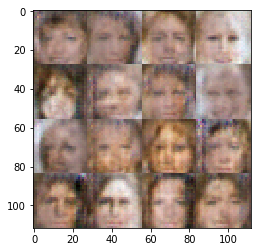

Epoch 0 Step 2000 d_loss: 1.3471927642822266 g_loss: 0.8501009941101074


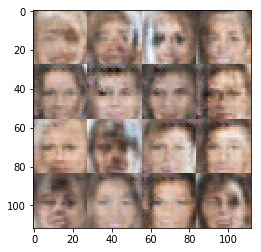

Epoch 0 Step 2100 d_loss: 1.5617759227752686 g_loss: 0.6672911643981934


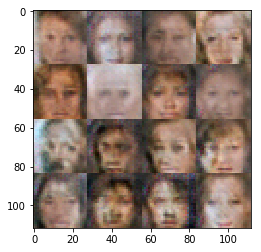

Epoch 0 Step 2200 d_loss: 1.533843755722046 g_loss: 0.37387850880622864


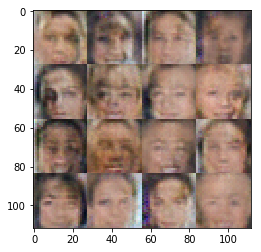

Epoch 0 Step 2300 d_loss: 1.2218172550201416 g_loss: 0.6073398590087891


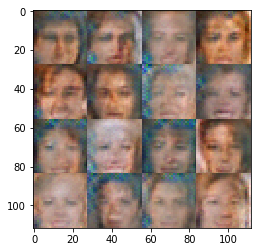

Epoch 0 Step 2400 d_loss: 1.3897393941879272 g_loss: 1.3178529739379883


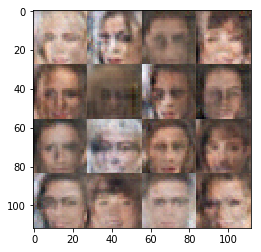

Epoch 0 Step 2500 d_loss: 1.1085351705551147 g_loss: 0.8963521122932434


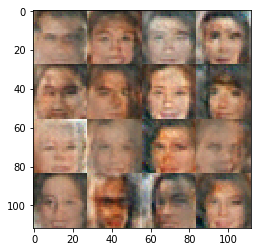

Epoch 0 Step 2600 d_loss: 1.3013439178466797 g_loss: 0.5074113607406616


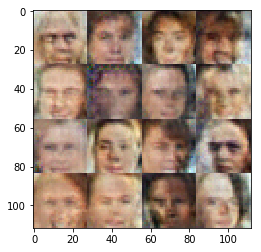

Epoch 0 Step 2700 d_loss: 1.2185879945755005 g_loss: 0.6039936542510986


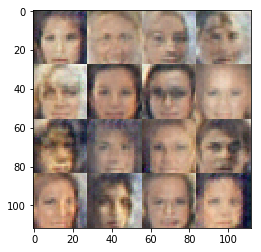

Epoch 0 Step 2800 d_loss: 1.5186420679092407 g_loss: 0.500458836555481


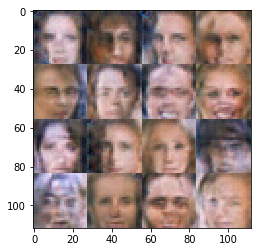

Epoch 0 Step 2900 d_loss: 1.3495867252349854 g_loss: 0.5432168245315552


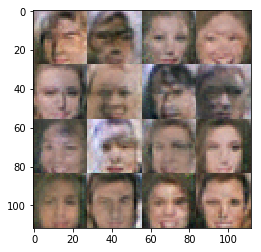

Epoch 0 Step 3000 d_loss: 1.3874447345733643 g_loss: 0.449322909116745


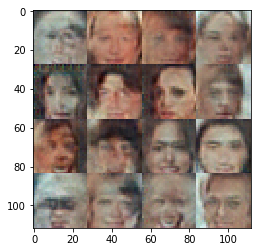

Epoch 0 Step 3100 d_loss: 1.326807975769043 g_loss: 0.7294991612434387


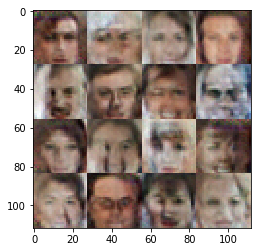

Epoch 0 Step 3200 d_loss: 1.111575722694397 g_loss: 0.9522950649261475


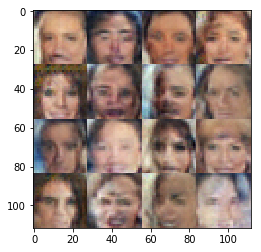

Epoch 0 Step 3300 d_loss: 1.0737106800079346 g_loss: 0.804505467414856


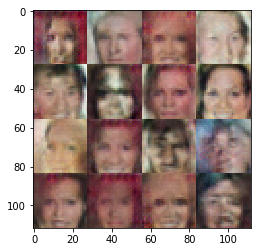

Epoch 0 Step 3400 d_loss: 1.6109036207199097 g_loss: 0.6084823608398438


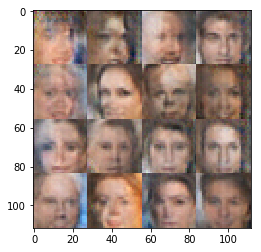

Epoch 0 Step 3500 d_loss: 1.3191546201705933 g_loss: 0.6123054027557373


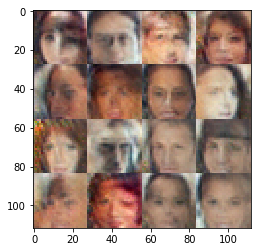

Epoch 0 Step 3600 d_loss: 0.6068041324615479 g_loss: 1.8401896953582764


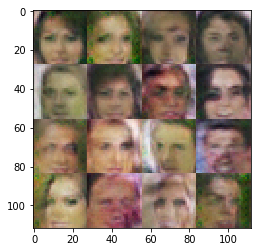

Epoch 0 Step 3700 d_loss: 1.288027048110962 g_loss: 0.5851309895515442


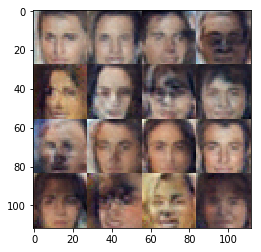

Epoch 0 Step 3800 d_loss: 1.2051661014556885 g_loss: 0.6430787444114685


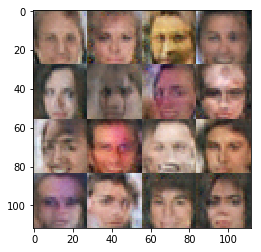

Epoch 0 Step 3900 d_loss: 1.6025195121765137 g_loss: 0.5233851671218872


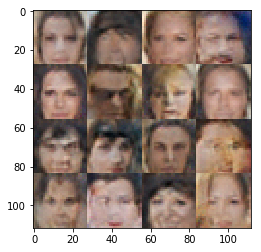

Epoch 0 Step 4000 d_loss: 1.2373936176300049 g_loss: 0.6423641443252563


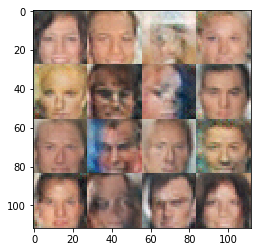

Epoch 0 Step 4100 d_loss: 1.4963493347167969 g_loss: 0.7976603507995605


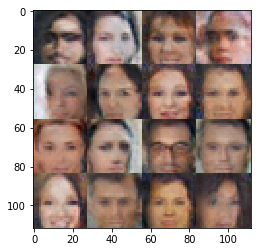

Epoch 0 Step 4200 d_loss: 1.432830810546875 g_loss: 0.6090207695960999


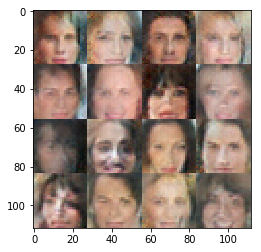

Epoch 0 Step 4300 d_loss: 1.2291269302368164 g_loss: 0.7989514470100403


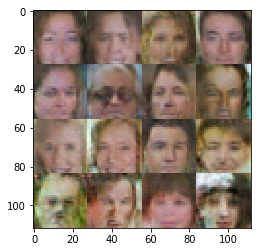

Epoch 0 Step 4400 d_loss: 1.2272067070007324 g_loss: 0.5340338945388794


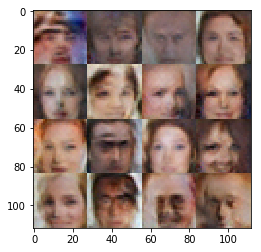

Epoch 0 Step 4500 d_loss: 1.5489442348480225 g_loss: 0.3604891300201416


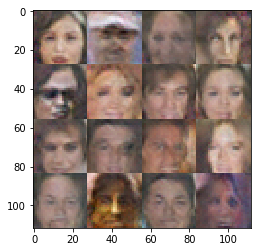

Epoch 0 Step 4600 d_loss: 1.3812201023101807 g_loss: 0.462904691696167


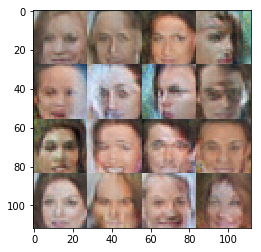

Epoch 0 Step 4700 d_loss: 1.4352160692214966 g_loss: 0.49516618251800537


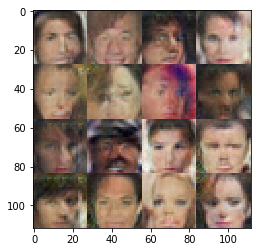

Epoch 0 Step 4800 d_loss: 1.1508090496063232 g_loss: 0.9217716455459595


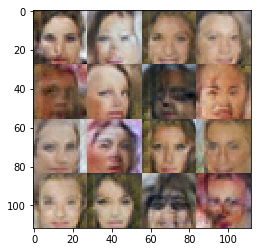

Epoch 0 Step 4900 d_loss: 1.3352450132369995 g_loss: 0.484702467918396


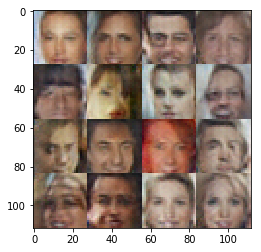

Epoch 0 Step 5000 d_loss: 1.2605578899383545 g_loss: 0.743881106376648


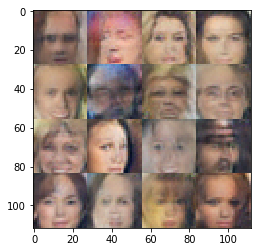

Epoch 0 Step 5100 d_loss: 1.171850323677063 g_loss: 0.7198846340179443


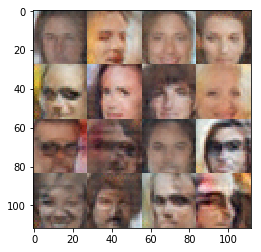

Epoch 0 Step 5200 d_loss: 1.5167467594146729 g_loss: 0.3630808889865875


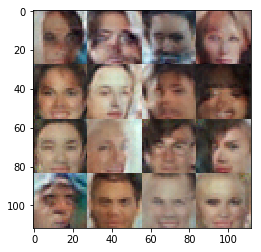

Epoch 0 Step 5300 d_loss: 1.1364244222640991 g_loss: 0.6076610088348389


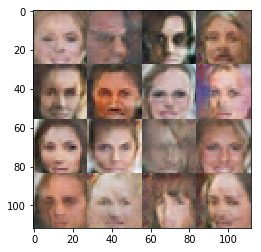

Epoch 0 Step 5400 d_loss: 1.1809985637664795 g_loss: 0.9178913831710815


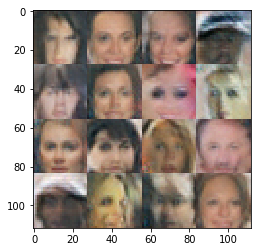

Epoch 0 Step 5500 d_loss: 1.368593454360962 g_loss: 0.8159654140472412


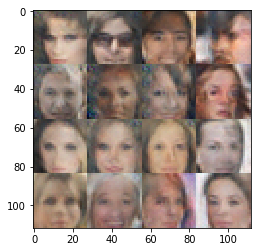

Epoch 0 Step 5600 d_loss: 1.227430820465088 g_loss: 0.7758219242095947


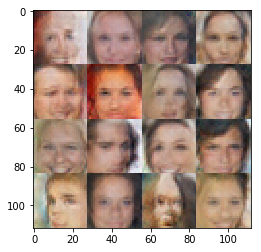

Epoch 0 Step 5700 d_loss: 1.361613154411316 g_loss: 0.6407638192176819


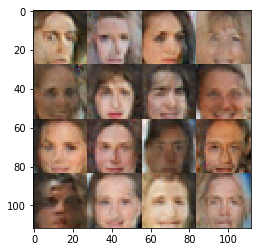

Epoch 0 Step 5800 d_loss: 1.3830667734146118 g_loss: 0.5500258207321167


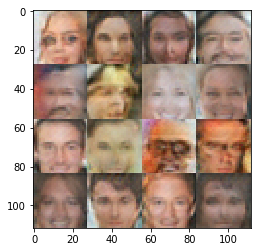

Epoch 0 Step 5900 d_loss: 1.3486446142196655 g_loss: 0.6670241355895996


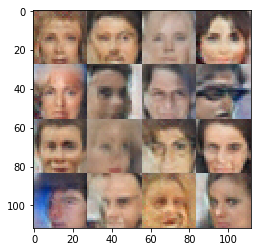

Epoch 0 Step 6000 d_loss: 1.422600269317627 g_loss: 0.43830958008766174


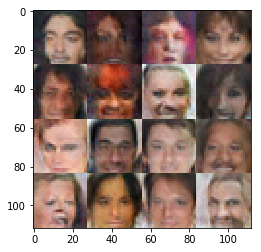

Epoch 0 Step 6100 d_loss: 1.30253005027771 g_loss: 0.7361319661140442


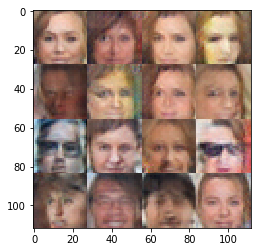

Epoch 0 Step 6200 d_loss: 1.3582112789154053 g_loss: 0.7161795496940613


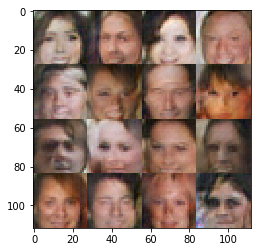

Epoch 0 Step 6300 d_loss: 1.3649611473083496 g_loss: 0.7833568453788757


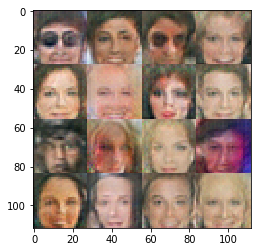

In [45]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.